In [1]:
from operator import index
import numpy as np
from fontTools.misc.plistlib import end_key
from scipy.special import comb
from scipy.sparse.linalg import eigs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
w = 1        
p = 0.2       
q = 0.2   
alpha = 0.7  
r = 0.001  
gamma = 0.8   
delta = 0.05
N = 50
tau = 0.9;
c = 0.16
M = 10;
UW = lambda w: w**(1-gamma)/(1-gamma)
combMatrix = np.nan * np.zeros((N+1, N+1))
for i in range(N+1):
    for j in range(i+1):
        combMatrix[i, j] = comb(i, j)

In [3]:
## The pafoffs of the sharing mechanism
PI_DD = p*UW((1-alpha)*w) + (1-p)*UW(w)

## refund mechanism
def p1(k,u,v,m,n):
    result = 0
    result = result + combMatrix[k, u]*combMatrix[k-u, v]*combMatrix[k-u-v, m]*(p-r)**u*(1-q-r)**v*(q+r-p)**m*r**n
    return result

def q2(k,u,v,m,n):
    if k>=M:
        result = 0
        if n!=0:
            result = result + (u+v)*UW(w-tau*c-delta*w) + m*UW(w-tau*c-delta*w+alpha*w)+n*UW((1-alpha)*w-tau*c-delta*w + (k*delta*w)/n)
        else:
            result = result + (u+v)*UW(w-tau*c)+m*UW(w-tau*c+alpha*w)
    else:
        result = 0
        if n!=0:
            result = result + (u+v)*UW(w-c-delta*w) + m*UW(w-c-delta*w+alpha*w)+n*UW((1-alpha)*w-c-delta*w + (k*delta*w)/n)
        else:
            result = result + (u+v)*UW(w-c)+m*UW(w-c+alpha*w)
        
    return result


Pi_CC_refund = np.zeros((N + 1))
for k in range(N+1):
     if k!=0:
        #I收益计算
        fuzhu1 = 0
        fuzhu2 = 0
        for u in range(k+1):
            for v in range(k+1-u):
                for m in range(k+1-u-v):
                    n=k-u-v-m
                    fuzhu1 = fuzhu1 + p1(k,u,v,m,n)*q2(k,u,v,m,n)
        Pi_CC_refund[k] = fuzhu1/k


## NoN refund mechanism
def seta(k):
    if k>=0:
        result = 1
    else:
        result = 0
    return result
def PI_CG(k):
    result = (1+p-q-2*r)*UW(w-tau*c-delta*w)+(q+r-p)*UW(w-tau*c+alpha*w-delta*w)
    fuzhu1 = 0;
    for h in range(k):
        fuzhu1 = fuzhu1 + r*combMatrix[k-1,h]*r**h*(1-r)**(k-1-h)*UW((1-alpha)*w-tau*c-delta*w+(k*delta*w)/(h+1))
    return result+fuzhu1
def PI_CI(k):
    result = (1+p-q-2*r)*UW(w-c-delta*w) + (q+r-p)*UW(w-c+alpha*w-delta*w)
    fuzhu1 = 0;
    for h in range(k):
        fuzhu1 = fuzhu1 + r*combMatrix[k-1,h]*r**h*(1-r)**(k-1-h)*UW((1-alpha)*w-c-delta*w+(k*delta*w)/(h+1))
    return result+fuzhu1

Pi_CC_NoN_refund = np.zeros((N + 1))
for k in range(N+1):
    if k>=1:
       Pi_CC_NoN_refund[k] = seta(k-M)*PI_CG(k) + (1-seta(k-M))*PI_CI(k)

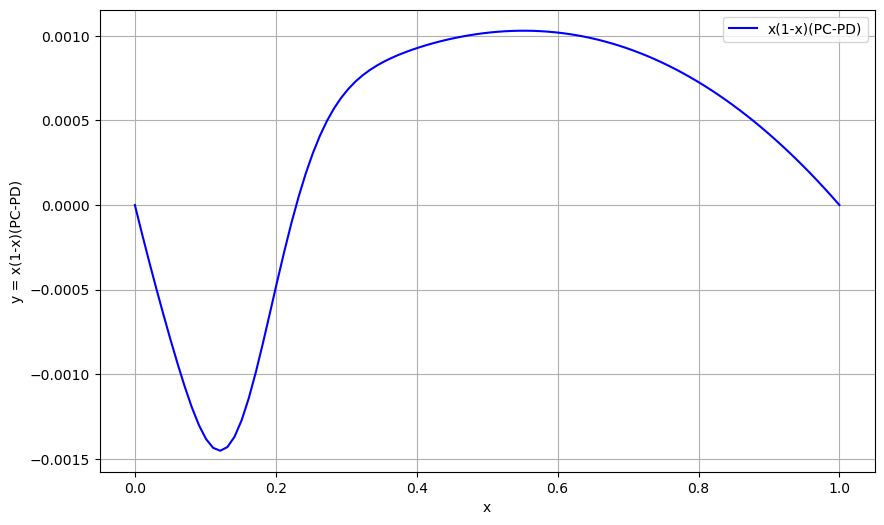

In [4]:
# Replication dynamics of the NoN-refund mechanism
def calculate_expression(x):
    PC = 0
    for k in range(N):
        PC += combMatrix[N-1, k] * (x ** k) * ((1 - x) ** (N - 1 - k)) *  Pi_CC_NoN_refund[k+1]
    
    PD = PI_DD
    result = x * (1 - x) * (PC - PD)
    return result
x_values = np.linspace(0, 1, 100) 
y_values = calculate_expression(x_values) 
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='x(1-x)(PC-PD)', color='blue')
plt.xlabel('x')
plt.ylabel('y = x(1-x)(PC-PD)')
plt.grid()
plt.legend()
plt.show()

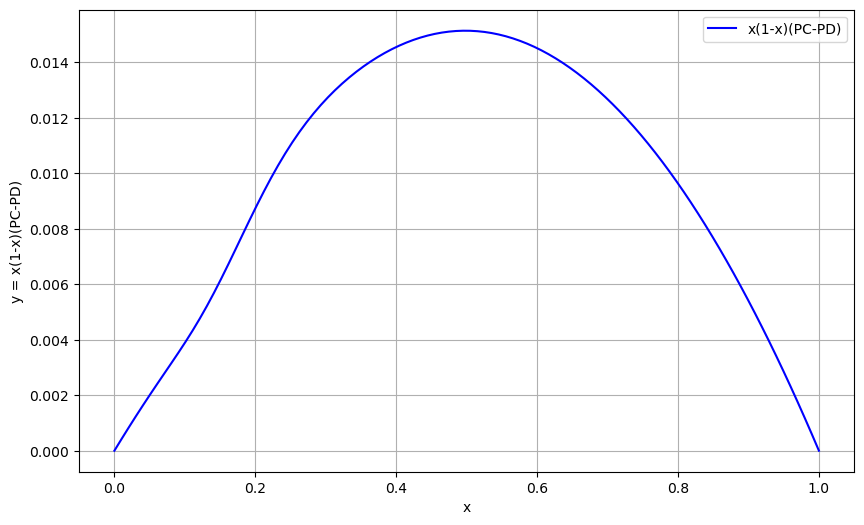

In [5]:
# Replication dynamics of the refund mechanism
def calculate_expression(x):
    PC = 0
    for k in range(N):
        PC += combMatrix[N-1, k] * (x ** k) * ((1 - x) ** (N - 1 - k)) *  Pi_CC_refund[k+1]
    
    PD = PI_DD
    result = x * (1 - x) * (PC - PD)
    return result

x_values = np.linspace(0, 1, 100)  
y_values = calculate_expression(x_values)  
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='x(1-x)(PC-PD)', color='blue')
plt.xlabel('x')
plt.ylabel('y = x(1-x)(PC-PD)')
plt.grid()
plt.legend()
plt.show()